코랩에서는 노트설정 TPU로 설정

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.7.0
Running on TPU  ['10.26.62.138:8470']
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.26.62.138:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.26.62.138:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 아이스크림 문제

In [ ]:
x = np.array([20, 21, 22, 23, 24], dtype=np.float64)
y = np.array([15, 16, 21, 33, 42], dtype=np.float64)

In [ ]:
x = tf.constant(x, dtype=tf.float64)
y = tf.constant(y, dtype=tf.float64)

a = tf.Variable([0], dtype=tf.float64)
b = tf.Variable([0], dtype=tf.float64)

## 손실함수

In [ ]:
def mse():
  yhat = a * x + b
  return tf.reduce_mean( tf.square(y - yhat) )

In [ ]:
optimizer = tf.optimizers.Adam(0.01)

## 추정

In [ ]:
for i in range(100000):
  optimizer.minimize(mse, var_list=[a, b])
  if i % 10000 == 0:
    print(f'{i} -> a: {a.numpy()}, b: {b.numpy()}, loss: {mse().numpy()}')

0 -> a: [0.01], b: [0.01], loss: 743.085100327811
10000 -> a: [3.81688321], b: [-58.27445909], loss: 30.665903802939187
20000 -> a: [7.01850207], b: [-128.99968247], loss: 9.033338040021755
30000 -> a: [7.1], b: [-130.8], loss: 9.02


KeyboardInterrupt: ignored

# 비선형회귀

In [ ]:
temp = np.array([32.13, 25.95, 27.95, 26.3, 26.33, 32.78, 31.48, 
    32.63, 28.2, 31.82, 25.52, 27.42, 28.92, 30.17, 
    29.09, 31.38, 29.52, 27.83, 30.27, 26.91])
elec = np.array([364.5, 105.82, 147.28, 89.57, 114.05, 411.23, 
    301.93, 386.16, 149.09, 327.93, 111.67, 130.59, 180.6, 
    214.77, 188.84, 312.11, 194.13, 135.12, 236.75, 113.6])

In [ ]:
df = pd.DataFrame( np.array( [elec, temp] ).T, columns=['elec', 'temp'] )
df.sort_values(by='temp', inplace=True, ignore_index=True)
df

,elec,temp
0,111.67,25.52
1,105.82,25.95
2,89.57,26.30
3,114.05,26.33
4,113.60,26.91
5,130.59,27.42
6,135.12,27.83
7,147.28,27.95
8,149.09,28.20
9,180.60,28.92


In [ ]:
# hidden model
@tf.function
def hidden():
  return tf.matmul(x, w1) + b1

# output model
@tf.function
def model():
  return tf.matmul(hidden(), w2) + b2

In [ ]:
@tf.function
def loss():
  return tf.reduce_mean( tf.square(y - model()) )


# Keras

In [ ]:
x = tf.constant(df[['temp']].to_numpy(), dtype=tf.float64)
y = tf.constant(df['elec'].to_numpy(), dtype=tf.float64)

In [ ]:
model = tf.keras.models.Sequential()

# layer는 생성된 모델 객체에 add를 통해서 쉽게 추가
model.add( tf.keras.layers.Dense(1, input_shape=x.shape) )

# 최적화 옵션
optimizer = tf.keras.optimizers.Adam(0.01)
model.compile(
  loss='mean_squared_error', 
  optimizer = optimizer
)

In [ ]:
history = model.fit(x, y, epochs=100000, verbose=0)

## history

In [ ]:
history.history['loss'][:10]

[50172.9609375,
 50052.57421875,
 49932.38671875,
 49812.3828125,
 49692.57421875,
 49572.95703125,
 49453.54296875,
 49334.3359375,
 49215.33203125,
 49096.53515625]

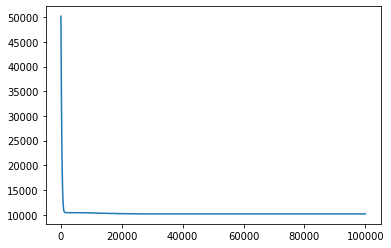

In [ ]:
plt.plot( history.history['loss'] )

In [ ]:
model.predict( df[['temp']] )

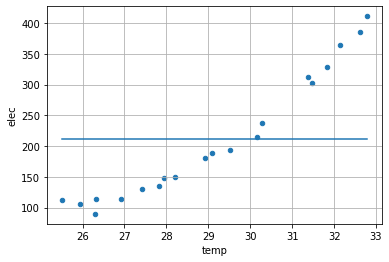

In [ ]:
df.plot(kind='scatter', x='temp', y='elec')
plt.plot( df['temp'].to_numpy(), model.predict( df[['temp']]).reshape(-1,1) )
plt.grid()
plt.show()

더 돌려봐야하는데 코랩에서는 시간이 너무 오래걸리므로 생략